In [28]:
import sys
sys.path.append("..")

import os
import glob
import numpy as np

%load_ext autoreload
%autoreload 2

from sicm import io
from sicm.utils import utils
from sicm.models.temperature import TemperatureModel
from sicm.models.comsol import ComsolModel, ComsolData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
datadir = "S:\\UsersData\\Martin\\projects\\thermometry\\comsol\\study10\\results\\_saved\\001"
exp_name = "ecJz" + ".txt"
comd = ComsolData(datadir, exp_name)
comd.data.head()

# datadir = "S:\\UsersData\\Martin\\projects\\thermometry\\comsol\\study5\\results\\_saved\\004"
exp_name = "T_tip" + ".txt"
comt = ComsolData(datadir, exp_name)
comt.data.head()

,rUME (m),d (m),Tsub (K),Temperature (K)
0,2.200000e-08,1.100000e-08,300.0,298.987183
1,2.200000e-08,1.100000e-08,310.0,303.547577
2,2.200000e-08,1.100000e-08,320.0,308.158875
3,2.200000e-08,1.100000e-08,330.0,312.810425
4,2.200000e-08,1.450082e-08,300.0,298.957306


In [30]:
r_sub = comd.data["rUME (m)"].unique()
d_pipette = 220e-9
T0 = 298.15
plot_approach = True
# Loop over repeats of temperature
for t in comd.data["Tsub (K)"].unique():
    xx = []
    yy = []
    TT = []
    for rr in r_sub:
        dsub = comd.data[(comd.data["Tsub (K)"] == t) & (comd.data["rUME (m)"] == rr)]
        xx.append(dsub["d (m)"].values / d_pipette)
        yy.append(dsub.iloc[:, 3].values / dsub.iloc[-1, 3])

        dsub2 = comt.data[(comt.data["Tsub (K)"] == t) & (comt.data["rUME (m)"] == rr)]
        TT.append(dsub2["Temperature (K)"].values - T0)
    
    # Asign instance of Temperature model
    tm = TemperatureModel(xx, yy, TT, T0, t, r_sub/d_pipette, d_pipette)
    
    # Make fpath
    fpath = os.path.join(comt.datadir, comt.name)
    # Make suffix and plot 
    # suffix = "_T{:.2f}K_d{:.0f}nm".format(t, tm.d_pipette*1e9)
    # fname = utils.make_fname(fpath, suffix.replace(".", "p"))
    # tm.plot(fname = fname)
    
    # Fit prediciton model
    tm.fit(err_lim = 3)
    
    # Check fits and save
    suffix = "_T{:.2f}K_d{:.0f}nm_Fit".format(t, tm.d_pipette*1e9)
    fname = utils.make_fname(fpath, suffix.replace(".", "p"))
    tm.check_fit(fname, plot_approach, text_loc = (0.55, 0.15))

NameError: name 'fit_err' is not defined

----
### Old Code

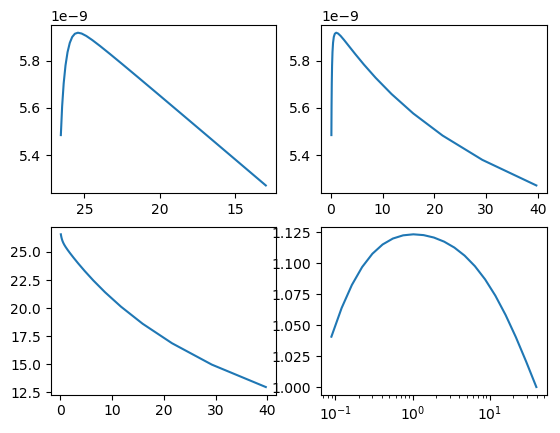

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2); ax = ax.flatten()
ax[0].plot(dsub2["Temperature (K)"].values - T0 , np.abs(dsub.iloc[:, 3].values))
ax[0].invert_xaxis()
ax[1].plot(dsub["d (m)"].values / d_pipette, np.abs(dsub.iloc[:, 3].values))
ax[2].plot(dsub["d (m)"].values / d_pipette, dsub2["Temperature (K)"].values - T0)
ax[3].plot(dsub["d (m)"].values / d_pipette, dsub.iloc[:, 3].values / dsub.iloc[-1, 3])
ax[3].set_xscale("log")
# plt.yscale('log')
# plt.xscale('log')